<a href="https://colab.research.google.com/github/Kenrich005/ISB_datasets/blob/main/Kenny_Oil_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 87.3 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [3]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
import os
from pmdarima import auto_arima 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose                       
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Kenrich005/ISB_datasets/main/oil_prod_data.csv')
df.head()

,Date,Item_ID,Real_gross_domestic_product,Gross_domestic_product,Consumer_price_index,Unemployment,Retail_trade,Industrial_production,Government_balance,Government_debt,Current_account_balance,Long_term_yield,House_price,Oilproduction
0,1/1/2002,1,7.9,14.6,1.2,5.7,1.4,-3.8,-4.8,55.0,-0.9,5.0,6.6,5848
1,1/2/2002,1,7.9,14.6,1.1,5.7,2.0,-3.1,-4.8,55.0,-0.9,4.9,6.5,5871
2,1/3/2002,1,7.9,14.6,1.4,5.7,2.7,-2.2,-4.8,55.0,-0.9,5.3,6.6,5883
3,1/4/2002,1,7.7,14.4,1.6,5.9,2.6,-1.4,-5.2,54.9,-1.0,5.2,6.6,5859
4,1/5/2002,1,7.7,14.4,1.2,5.8,0.9,-0.4,-5.2,54.9,-1.0,5.2,6.8,5924


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         250 non-null    object 
 1   Item_ID                      250 non-null    int64  
 2   Real_gross_domestic_product  250 non-null    float64
 3   Gross_domestic_product       250 non-null    float64
 4   Consumer_price_index         250 non-null    float64
 5   Unemployment                 250 non-null    float64
 6   Retail_trade                 250 non-null    float64
 7   Industrial_production        250 non-null    float64
 8   Government_balance           250 non-null    float64
 9   Government_debt              250 non-null    float64
 10  Current_account_balance      250 non-null    float64
 11  Long_term_yield              250 non-null    float64
 12  House_price                  250 non-null    float64
 13  Oilproduction       

In [7]:
df = df.drop('Item_ID',axis=1)
df.head()

,Date,Real_gross_domestic_product,Gross_domestic_product,Consumer_price_index,Unemployment,Retail_trade,Industrial_production,Government_balance,Government_debt,Current_account_balance,Long_term_yield,House_price,Oilproduction
0,1/1/2002,7.9,14.6,1.2,5.7,1.4,-3.8,-4.8,55.0,-0.9,5.0,6.6,5848
1,1/2/2002,7.9,14.6,1.1,5.7,2.0,-3.1,-4.8,55.0,-0.9,4.9,6.5,5871
2,1/3/2002,7.9,14.6,1.4,5.7,2.7,-2.2,-4.8,55.0,-0.9,5.3,6.6,5883
3,1/4/2002,7.7,14.4,1.6,5.9,2.6,-1.4,-5.2,54.9,-1.0,5.2,6.6,5859
4,1/5/2002,7.7,14.4,1.2,5.8,0.9,-0.4,-5.2,54.9,-1.0,5.2,6.8,5924


In [8]:
df.isnull().sum()

Date                           0
Real_gross_domestic_product    0
Gross_domestic_product         0
Consumer_price_index           0
Unemployment                   0
Retail_trade                   0
Industrial_production          0
Government_balance             0
Government_debt                0
Current_account_balance        0
Long_term_yield                0
House_price                    0
Oilproduction                  0
dtype: int64

In [11]:
df[['Date','Oilproduction']]

,Date,Oilproduction
0,1/1/2002,5848
1,1/2/2002,5871
2,1/3/2002,5883
3,1/4/2002,5859
4,1/5/2002,5924
...,...,...
245,1/6/2022,11797
246,1/7/2022,11844
247,1/8/2022,12002
248,1/9/2022,12312


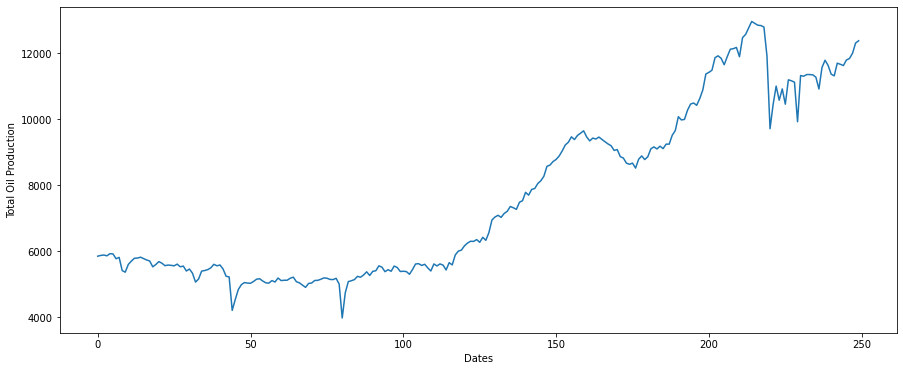

In [12]:
plt.figure(figsize=(15,6))
plt.plot(df['Oilproduction'])
plt.xlabel('Dates')
plt.ylabel('Total Oil Production');

In [13]:
# Converting date column into datetime format
df.Date = pd.to_datetime(df.Date)

# Setting the date column as index and converting price to numeric format
df = df.set_index("Date")

In [14]:
df.head()

,Real_gross_domestic_product,Gross_domestic_product,Consumer_price_index,Unemployment,Retail_trade,Industrial_production,Government_balance,Government_debt,Current_account_balance,Long_term_yield,House_price,Oilproduction
Date,,,,,,,,,,,,
2002-01-01,7.9,14.6,1.2,5.7,1.4,-3.8,-4.8,55.0,-0.9,5.0,6.6,5848
2002-01-02,7.9,14.6,1.1,5.7,2.0,-3.1,-4.8,55.0,-0.9,4.9,6.5,5871
2002-01-03,7.9,14.6,1.4,5.7,2.7,-2.2,-4.8,55.0,-0.9,5.3,6.6,5883
2002-01-04,7.7,14.4,1.6,5.9,2.6,-1.4,-5.2,54.9,-1.0,5.2,6.6,5859
2002-01-05,7.7,14.4,1.2,5.8,0.9,-0.4,-5.2,54.9,-1.0,5.2,6.8,5924


In [15]:
df['Oilproduction']

Date
2002-01-01     5848
2002-01-02     5871
2002-01-03     5883
2002-01-04     5859
2002-01-05     5924
              ...  
2022-01-06    11797
2022-01-07    11844
2022-01-08    12002
2022-01-09    12312
2022-01-10    12381
Name: Oilproduction, Length: 250, dtype: int64

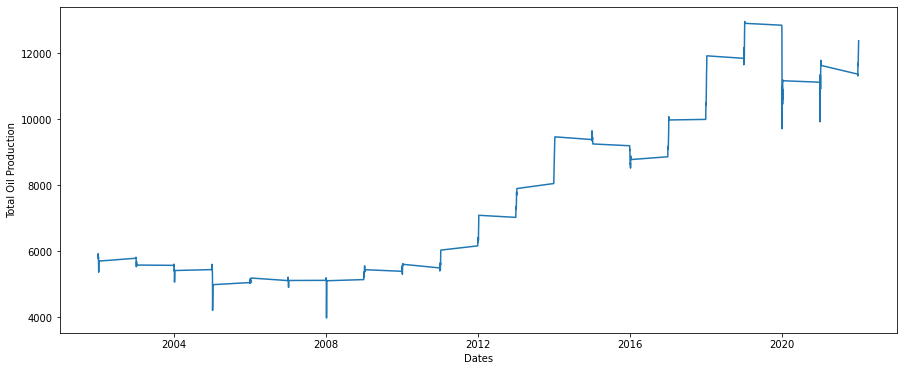

In [11]:
plt.figure(figsize=(15,6))
plt.plot(df['Oilproduction'])
plt.xlabel('Dates')
plt.ylabel('Total Oil Production');

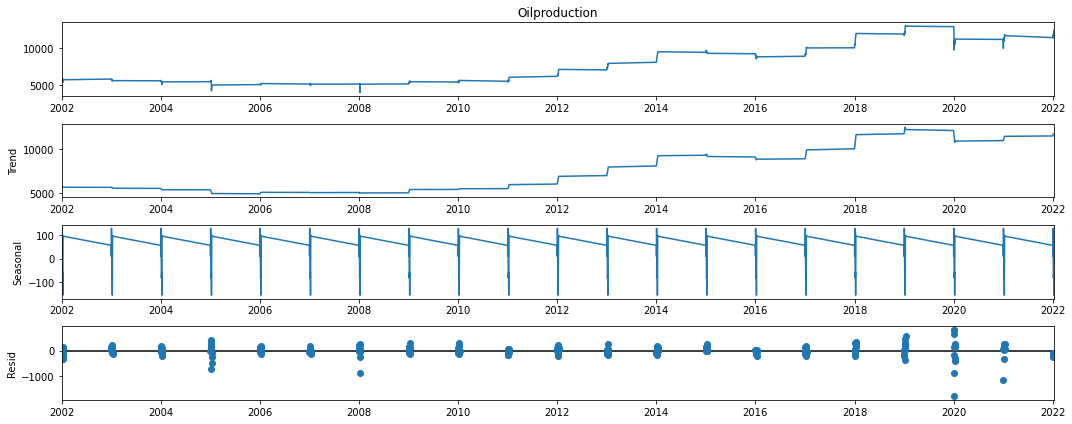

In [12]:
decomp_viz = seasonal_decompose(df.Oilproduction, model = "add",period=12)
fig = decomp_viz.plot()
fig.set_size_inches((15, 6))
# Tight layout to realign things
fig.tight_layout()
plt.show();

In [13]:
# Let's run auto_arima() function to get best p,d,q,P,D,Q values
auto_arima(df.Oilproduction, seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  250
Model:             SARIMAX(2, 1, 2)x(1, 0, [], 12)   Log Likelihood               -1743.253
Date:                             Sat, 25 Feb 2023   AIC                           3500.505
Time:                                     06:17:24   BIC                           3525.127
Sample:                                          0   HQIC                          3510.416
                                             - 250                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     30.5862     26.529      1.153      0.249     -21.409      82.582
ar.L1          0.6996      0.063     11.096      0.000       0.576       0.823
ar.L2         -0.9365      0.057    -16.401      0.000      -1.048      -0.825
ma.L1         -0.7985      0.065    -12.211      0.000      -0.927      -0.670
ma.L2          0.9567      0.054     17.794      0.000       0.851       1.062
ar.S.L12       0.0996      0.082      1.211      0.226      -0.062       0.261
sigma2      7.017e+04   2190.736     32.029      0.000    6.59e+04    7.45e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):              7176.46
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               3.36   Skew:                            -2.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
# splitting the data into train and test set
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
train_data.shape, test_data.shape

((238, 12), (12, 12))

In [15]:
arima_model = SARIMAX(train_data['Oilproduction'], order = (2,1,2), seasonal_order = (1,0,0,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                       Oilproduction   No. Observations:                  238
Model:             SARIMAX(2, 1, 2)x(1, 0, [], 12)   Log Likelihood               -1663.153
Date:                             Sat, 25 Feb 2023   AIC                           3338.306
Time:                                     06:17:28   BIC                           3359.114
Sample:                                          0   HQIC                          3346.693
                                             - 238                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6314      0.057     11.013      0.000       0.519       0.744
ar.L2         -0.9304      0.060    -15.530      0.000      -1.048      -0.813
ma.L1         -0.7391      0.063    -11.796      0.000      -0.862      -0.616
ma.L2          0.9365      0.058     16.237      0.000       0.823       1.050
ar.S.L12       0.0890      0.082      1.091      0.275      -0.071       0.249
sigma2      7.268e+04   2509.691     28.959      0.000    6.78e+04    7.76e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):              6611.75
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               5.87   Skew:                            -2.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
test_data.index

DatetimeIndex(['2021-01-11', '2021-01-12', '2022-01-01', '2022-01-02',
               '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [17]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred = arima_pred.set_axis(test_data.index)
arima_pred

Date
2021-01-11    11451.734150
2021-01-12    11228.104247
2022-01-01    11254.851747
2022-01-02    11373.252090
2022-01-03    11611.554375
2022-01-04    11471.980972
2022-01-05    11283.860513
2022-01-06    11290.329148
2022-01-07    11472.864614
2022-01-08    11576.381979
2022-01-09    11443.152185
2022-01-10    11335.029483
Name: ARIMA Predictions, dtype: float64

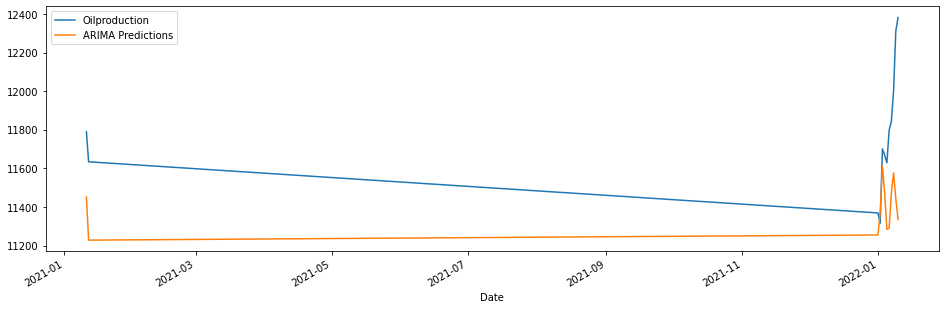

In [18]:
test_data['Oilproduction'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [19]:
arima_rmse_error = rmse(test_data['Oilproduction'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Oilproduction'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 240465.5329367103
RMSE Error: 490.37285093764143
Mean: 7662.032


## LSTM Forecast

In [20]:
# LSTM requires a series (target column alone)
train_oil_prod = train_data[['Oilproduction']]
test_oil_prod = test_data[['Oilproduction']]
train_oil_prod

,Oilproduction
Date,
2002-01-01,5848
2002-01-02,5871
2002-01-03,5883
2002-01-04,5859
2002-01-05,5924
...,...
2021-01-06,11356
2021-01-07,11347
2021-01-08,11277


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
scaler.fit(train_oil_prod)
scaled_train_data = scaler.transform(train_oil_prod)
scaled_test_data = scaler.transform(test_oil_prod)

In [23]:
#Before creating LSTM model we should create a Time Series Generator object.
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [25]:
lstm_model.fit_generator(generator,epochs=10)

Epoch 1/10
226/226 [==============================] - 11s 22ms/step - loss: 0.0176
Epoch 2/10
226/226 [==============================] - 6s 24ms/step - loss: 0.0036
Epoch 3/10
226/226 [==============================] - 5s 21ms/step - loss: 0.0039
Epoch 4/10
226/226 [==============================] - 6s 28ms/step - loss: 0.0029
Epoch 5/10
226/226 [==============================] - 5s 20ms/step - loss: 0.0025
Epoch 6/10
226/226 [==============================] - 5s 20ms/step - loss: 0.0030
Epoch 7/10
226/226 [==============================] - 6s 27ms/step - loss: 0.0025
Epoch 8/10
226/226 [==============================] - 5s 20ms/step - loss: 0.0031
Epoch 9/10
226/226 [==============================] - 6s 28ms/step - loss: 0.0022
Epoch 10/10
226/226 [==============================] - 5s 21ms/step - loss: 0.0025


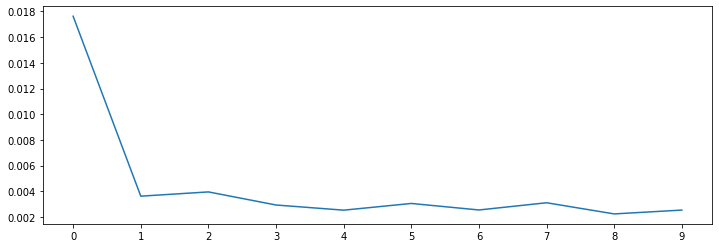

In [26]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [27]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


In [28]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
test_data['LSTM_Predictions'] = lstm_predictions
test_data[['LSTM_Predictions','Oilproduction']].head()

,LSTM_Predictions,Oilproduction
Date,,
2021-01-11,11134.513382,11790
2021-01-12,11090.076527,11634
2022-01-01,11042.728310,11369
2022-01-02,10993.912621,11316
2022-01-03,10939.230259,11701


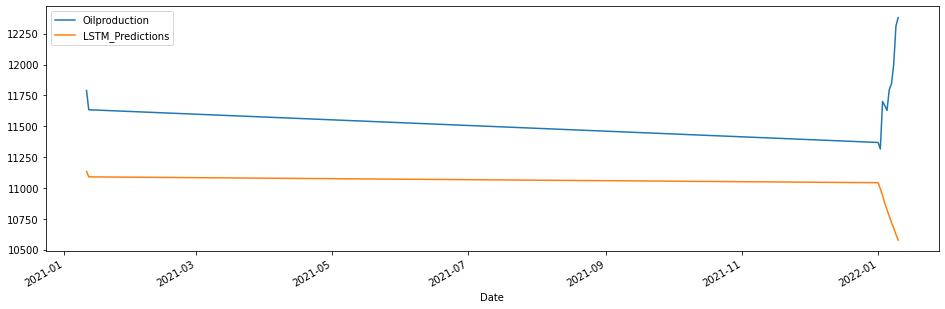

In [29]:
test_data['Oilproduction'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [30]:
lstm_rmse_error = rmse(test_data['Oilproduction'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Oilproduction'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 1080895.484470263
RMSE Error: 1039.6612354369393
Mean: 7662.032


## Prophet Forecast

In [31]:
# Syntax for prophet requires some data manipulation

df_pr = df[['Oilproduction']].copy().reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
df_pr.head()

,ds,y
0,2002-01-01,5848
1,2002-01-02,5871
2,2002-01-03,5883
3,2002-01-04,5859
4,2002-01-05,5924


In [32]:
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [33]:
from prophet import Prophet

In [34]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75uu5n5y/fl4exrkj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75uu5n5y/75u5zewq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74042', 'data', 'file=/tmp/tmp75uu5n5y/fl4exrkj.json', 'init=/tmp/tmp75uu5n5y/75u5zewq.json', 'output', 'file=/tmp/tmp75uu5n5y/prophet_modelfwiwuvzs/prophet_model-20230225061841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:18:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:18:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [35]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
245,2021-09-01,12742.372203,12315.441427,13847.915640,12724.826066,12762.082226,313.904970,313.904970,313.904970,27.258417,27.258417,27.258417,286.646553,286.646553,286.646553,0.0,0.0,0.0,13056.277173
246,2021-10-01,12785.584548,11886.857705,13328.432916,12764.263262,12810.332749,-170.043234,-170.043234,-170.043234,92.246194,92.246194,92.246194,-262.289428,-262.289428,-262.289428,0.0,0.0,0.0,12615.541314
247,2021-11-01,12830.237305,11174.951611,12559.939164,12802.941933,12859.990979,-965.806043,-965.806043,-965.806043,-86.164502,-86.164502,-86.164502,-879.641542,-879.641542,-879.641542,0.0,0.0,0.0,11864.431261
248,2021-12-01,12873.449650,11211.146277,12684.654595,12841.926624,12907.600492,-920.536555,-920.536555,-920.536555,27.258417,27.258417,27.258417,-947.794972,-947.794972,-947.794972,0.0,0.0,0.0,11952.913095
249,2022-01-01,12918.102406,11808.830498,13250.518765,12881.693665,12958.148036,-328.872152,-328.872152,-328.872152,8.133896,8.133896,8.133896,-337.006048,-337.006048,-337.006048,0.0,0.0,0.0,12589.230254


In [36]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
2021-02-01,15547.461063
2021-03-01,11721.466594
2021-04-01,11769.015075
2021-05-01,12088.649748
2021-06-01,12550.518496
2021-07-01,13131.290766
2021-08-01,13025.817689
2021-09-01,13056.277173
2021-10-01,12615.541314


In [37]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

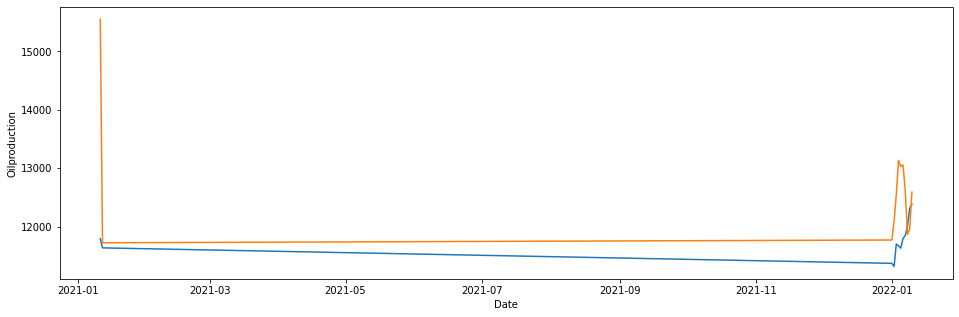

In [38]:
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Oilproduction"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [39]:
prophet_rmse_error = rmse(test_data['Oilproduction'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Oilproduction'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 1839120.694599215
RMSE Error: 1356.1418416224813
Mean: 7662.032
